# Explanatory Data Analysis

## Questions to be answered


1. Has the number of crimes increased or decreased over the century?
2. What are the most common crimes committed? And most common punishments? Have they changed over the years?
3. What is the relation between gender with crime committing? Has it changed over the years?


In [1]:
import pandas as pd
import lxml
from lxml import etree
import os
import json
import wget
import unzip
import numpy as np
from matplotlib import pyplot as plt

## Data import

### Local import

In [13]:
df = pd.read_json('../cleaned_data.json', lines=True)
df['trial_date'] = pd.to_datetime(df['trial_date'], unit='ms')

### Colab import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Converting JSON do Dataframe and fixing datetime.

In [ ]:
df = pd.read_json('/content/cleaned_data.json', lines=True)
df['trial_date'] = pd.to_datetime(df['trial_date'], unit='ms')

## Has the number of crimes increased or decreased over the century? If positive, by how much?

#### Methodology
1. Create specific columns for day, month and year of trial based on 'trial_date' column.
2.  Plot values.

In [14]:
df.tail(5)

,trial_id,trial_date,defendant_gender,defendant_age,defendant_occupation,victim_gender,verdict_category,verdict_subcategory,offence_category,offence_subcategory,punishment_category,punishment_subcategory
197746,t19130401-63,1913-04-01,[male],[45],[clicker],[female],[guilty],[pleadedGuilty],[breakingPeace],[wounding],[imprison],[hardLabour]
197747,t19130401-64,1913-04-01,[male],[24],[labourer],None,[guilty],[no_subcategory],[sexual],[rape],[imprison],[hardLabour]
197748,t19130401-65,1913-04-01,"[male, male]","[24, 18]",None,[male],[notGuilty],[noEvidence],[kill],[manslaughter],None,None
197749,t19130401-66,1913-04-01,[male],[17],[labourer],None,[guilty],[no_subcategory],[sexual],[sodomy],[imprison],[otherInstitution]
197750,t19130401-67,1913-04-01,[female],[53],None,None,[guilty],[withRecommendation],[damage],[other],[imprison],[penalServitude]


In [15]:
df_timestamp = df.copy()

Creating new columns for, day, month and year

In [16]:
df_timestamp['trial_month'] = df_timestamp['trial_date'].dt.month.convert_dtypes(convert_integer=True)

df_timestamp['trial_year'] = df_timestamp['trial_date'].dt.year.convert_dtypes(convert_integer=True)

df_timestamp['trial_day'] = df_timestamp['trial_date'].dt.day.convert_dtypes(convert_integer=True)

#### Trials per day

In [17]:
# Number of trials per day number
df_timestamp['trial_day'].value_counts().sort_values(ascending=True)

trial_day
31    2393
29    4305
30    4340
1     4413
24    4507
22    5011
19    5379
26    5502
25    5507
21    5530
27    5570
20    5577
2     5640
23    5708
18    6577
13    6628
4     6687
28    6707
5     6716
7     6719
9     6749
3     7457
8     7628
12    7720
17    7793
6     7815
10    8065
11    8486
14    8567
16    8776
15    9050
Name: count, dtype: Int64

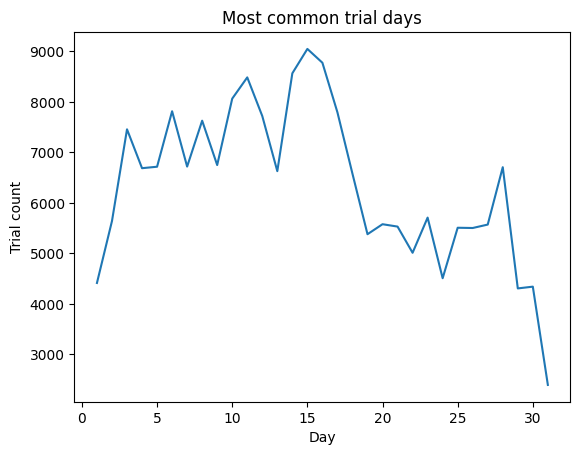

In [18]:
trials_per_day = df_timestamp['trial_day'].value_counts().sort_index()
plt.plot(trials_per_day.index, trials_per_day.values)
plt.xlabel('Day')
plt.ylabel('Trial count')
plt.title('Most common trial days')
plt.show()


#### Trials per month

In [19]:
df_timestamp['trial_month'].value_counts().sort_values(ascending=True)

trial_month
3      5811
8      9099
11     9775
6     14123
7     14834
12    17690
5     17996
1     19416
2     20381
10    20447
4     22642
9     25308
Name: count, dtype: Int64

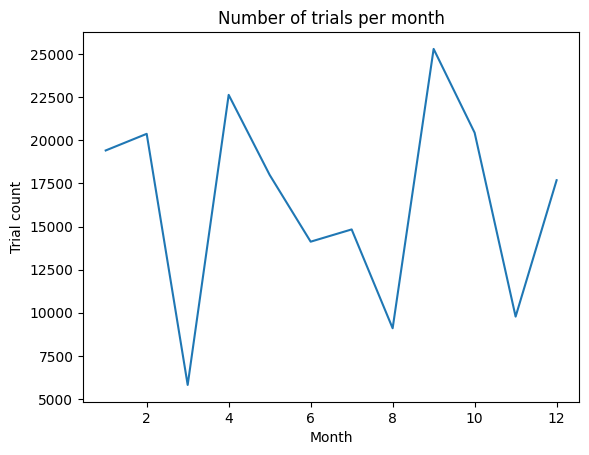

In [20]:
trials_per_month = df_timestamp['trial_month'].value_counts().sort_index()
plt.plot(trials_per_month.index, trials_per_month.values)
plt.xlabel('Month')
plt.ylabel('Trial count')
plt.title('Number of trials per month')
plt.show()

#### Trials per year

In [21]:
# Number of trials per year
df_timestamp['trial_year'].value_counts().sort_values(ascending=True)

trial_year
1706       1
1677      25
1702      69
1703      72
1709      99
        ... 
1838    2718
1841    2791
1839    2822
1842    3090
1843    3100
Name: count, Length: 235, dtype: Int64

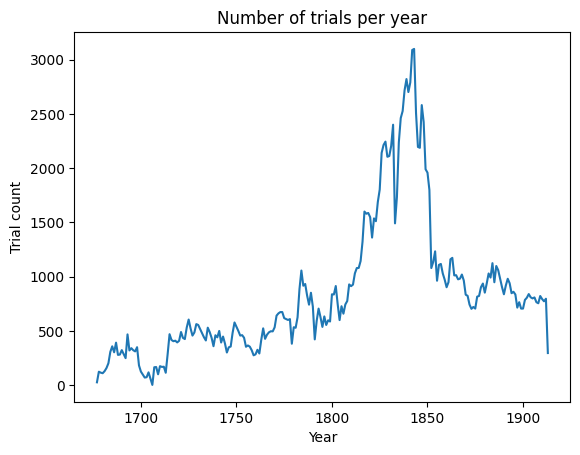

In [22]:
trials_per_year = df_timestamp['trial_year'].value_counts().sort_index()
plt.plot(trials_per_year.index, trials_per_year.values)
plt.xlabel('Year')
plt.ylabel('Trial count')
plt.title('Number of trials per year')
plt.show()

## What are the most common crimes committed? And most common punishments? Have they changed over the years?

In [23]:
df.tail(10)

,trial_id,trial_date,defendant_gender,defendant_age,defendant_occupation,victim_gender,verdict_category,verdict_subcategory,offence_category,offence_subcategory,punishment_category,punishment_subcategory
197741,t19130401-58,1913-04-01,[male],[36],[surveyor],"[male, male, male, male, male]",[guilty],[pleadedGuilty],[deception],[fraud],[imprison],[hardLabour]
197742,t19130401-59,1913-04-01,[male],[26],[telegraphist],None,[notGuilty],None,[deception],[forgery],None,None
197743,t19130401-60,1913-04-01,"[male, male, male]","[20, 25, 23]","[artist, no occupation]","[female, female, female, female, female]","[guilty, guilty, guilty]","[pleadedGuilty, pleadedPartGuilty, no_subcateg...","[theft, theft, theft]","[theftFromPlace, theftFromPlace, theftFromPlace]","[imprison, imprison]","[hardLabour, penalServitude]"
197744,t19130401-61,1913-04-01,[male],[43],[fireman],None,[guilty],[pleadedGuilty],[theft],[theftFromPlace],[imprison],[penalServitude]
197745,t19130401-62,1913-04-01,[male],[45],[labourer],[male],[guilty],[pleadedGuilty],[theft],[simpleLarceny],[imprison],[hardLabour]
197746,t19130401-63,1913-04-01,[male],[45],[clicker],[female],[guilty],[pleadedGuilty],[breakingPeace],[wounding],[imprison],[hardLabour]
197747,t19130401-64,1913-04-01,[male],[24],[labourer],None,[guilty],[no_subcategory],[sexual],[rape],[imprison],[hardLabour]
197748,t19130401-65,1913-04-01,"[male, male]","[24, 18]",None,[male],[notGuilty],[noEvidence],[kill],[manslaughter],None,None
197749,t19130401-66,1913-04-01,[male],[17],[labourer],None,[guilty],[no_subcategory],[sexual],[sodomy],[imprison],[otherInstitution]
197750,t19130401-67,1913-04-01,[female],[53],None,None,[guilty],[withRecommendation],[damage],[other],[imprison],[penalServitude]


In [24]:
df[['offence_category', 'offence_subcategory']]

,offence_category,offence_subcategory
0,[violentTheft],[highwayRobbery]
1,[theft],[grandLarceny]
2,[theft],[burglary]
3,[sexual],[rape]
4,[theft],[other]
...,...,...
197746,[breakingPeace],[wounding]
197747,[sexual],[rape]
197748,[kill],[manslaughter]
197749,[sexual],[sodomy]


Exploding list values on dataframe.

In [25]:
df_offences = df.explode(['offence_category', 'offence_subcategory'])
df_offences

,trial_id,trial_date,defendant_gender,defendant_age,defendant_occupation,victim_gender,verdict_category,verdict_subcategory,offence_category,offence_subcategory,punishment_category,punishment_subcategory
0,t16740429-1,NaT,[male],None,None,[male],[guilty],None,violentTheft,highwayRobbery,None,None
1,t16740429-2,NaT,[male],None,None,[male],[guilty],None,theft,grandLarceny,[death],None
2,t16740429-3,NaT,"[male, male, male]",None,None,[male],[guilty],None,theft,burglary,None,None
3,t16740429-4,NaT,[male],None,None,[female],[notGuilty],None,sexual,rape,None,None
4,t16740429-5,NaT,[female],None,None,[female],[guilty],None,theft,other,[transport],None
...,...,...,...,...,...,...,...,...,...,...,...,...
197746,t19130401-63,1913-04-01,[male],[45],[clicker],[female],[guilty],[pleadedGuilty],breakingPeace,wounding,[imprison],[hardLabour]
197747,t19130401-64,1913-04-01,[male],[24],[labourer],None,[guilty],[no_subcategory],sexual,rape,[imprison],[hardLabour]
197748,t19130401-65,1913-04-01,"[male, male]","[24, 18]",None,[male],[notGuilty],[noEvidence],kill,manslaughter,None,None
197749,t19130401-66,1913-04-01,[male],[17],[labourer],None,[guilty],[no_subcategory],sexual,sodomy,[imprison],[otherInstitution]


Counting of offences by category and subcategory

In [26]:
df_offences[['offence_category', 'offence_subcategory']].value_counts()

offence_category  offence_subcategory
theft             grandLarceny           41257
                  simpleLarceny          30653
                  theftFromPlace         15342
                  pocketpicking          13655
                  stealingFromMaster     10934
                                         ...  
royalOffences     seducingAllegiance        21
miscellaneous     piracy                     7
breakingPeace     vagabond                   4
                  barratry                   2
violentTheft      other                      1
Name: count, Length: 64, dtype: int64

Count of offences category.

In [27]:
offences_count = df_offences['offence_category'].value_counts()
offences_count

offence_category
theft            150993
deception         15871
royalOffences     10680
violentTheft       9012
breakingPeace      7686
sexual             7219
kill               5375
miscellaneous      3224
damage             1054
Name: count, dtype: int64

Noticing high count value of theft, it was calculated its proportion among the other categories.

In [28]:
total_offences = np.array(offences_count.values)
total_offences = sum(offences_count)
total_offences

theft_pct = (offences_count['theft'] / total_offences) * 100
print(f'Theft represents {theft_pct:.1f}% of all offences.')

Theft represents 71.5% of all offences.


Since theft represents more than 70% of the data, it was prefered to plot it separately from other offences to make the visualization cleaner.

In [29]:
non_theft_count = offences_count.iloc[1:9]
non_theft_sum = np.array(non_theft_count.values)
non_theft_sum = sum(non_theft_count)

offences_count['non_theft'] = non_theft_sum
offences_count

offence_category
theft            150993
deception         15871
royalOffences     10680
violentTheft       9012
breakingPeace      7686
sexual             7219
kill               5375
miscellaneous      3224
damage             1054
non_theft         60121
Name: count, dtype: int64

#### Plotting theft proportion among the offences.

In [30]:
offences_to_plot = offences_count.loc[['theft', 'non_theft']]
offences_to_plot

offence_category
theft        150993
non_theft     60121
Name: count, dtype: int64

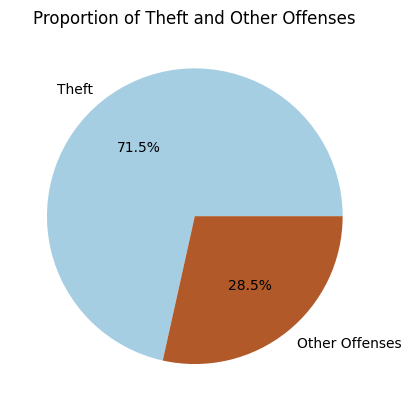

In [31]:
offences_to_plot.plot(kind='pie',
                      autopct='%1.1f%%',
                      colormap='Paired',
                      labels=['Theft', 'Other Offenses',],
                      ylabel='',
                      )
plt.title("Proportion of Theft and Other Offenses", loc='center')
plt.show()

#### Plotting proportion of offences (without theft)

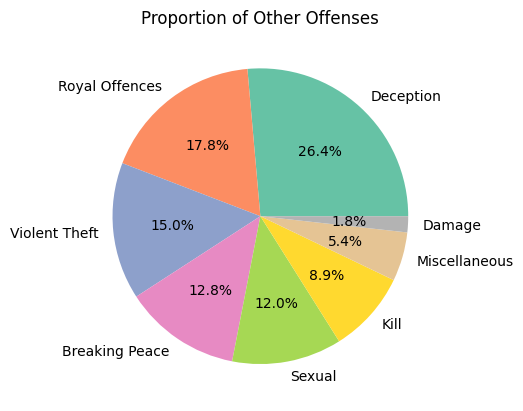

In [32]:
non_theft_count.plot(kind='pie',
                      autopct='%1.1f%%',
                      colormap='Set2',
                      labels=['Deception', 'Royal Offences', 'Violent Theft', 'Breaking Peace', 'Sexual', 'Kill', 'Miscellaneous', 'Damage'],
                      ylabel='',

                      )
plt.title("Proportion of Other Offenses", loc='center')
plt.show()

#### Plotting proportion of each subcategory among its categories.

Storing offence category and subcategory

In [33]:
subcategory_counts = df_offences[['offence_category', 'offence_subcategory']].value_counts()
subcategory_counts

offence_category  offence_subcategory
theft             grandLarceny           41257
                  simpleLarceny          30653
                  theftFromPlace         15342
                  pocketpicking          13655
                  stealingFromMaster     10934
                                         ...  
royalOffences     seducingAllegiance        21
miscellaneous     piracy                     7
breakingPeace     vagabond                   4
                  barratry                   2
violentTheft      other                      1
Name: count, Length: 64, dtype: int64

In [34]:
# Getting offence category list
subcategory_counts_idx = subcategory_counts.index.get_level_values('offence_category').unique()
subcategory_counts_idx

Index(['theft', 'royalOffences', 'deception', 'breakingPeace', 'violentTheft',
       'kill', 'sexual', 'miscellaneous', 'damage'],
      dtype='object', name='offence_category')

Creating different dataset for each category.

In [35]:
# Storing subcategories of each offence
kill_sub = subcategory_counts.loc['kill'].head(3)
sexual_sub = subcategory_counts.loc['sexual'].head(4)
breaking_sub = subcategory_counts.loc['breakingPeace'].head(3)
deception_sub = subcategory_counts.loc['deception'].head(3)

Renaming for better visualization.

In [36]:
kill_sub = kill_sub.rename({'infanticide': 'Infanticide', 'manslaughter': 'Manslaugher', 'murder': 'Murder'})
sexual_sub = sexual_sub.rename({'bigamy': 'Bigamy', 'rape': 'Rape', 'sodomy': 'Sodomy', 'assaultWithIntent': 'Assault with intent'})
breaking_sub = breaking_sub.rename({'wounding': 'Wounding', 'assault': 'Assault', 'libel': 'Libel'})
deception_sub = deception_sub.rename({'forgery': 'Forgery', 'fraud': 'Fraud', 'perjury': 'Perjury'})

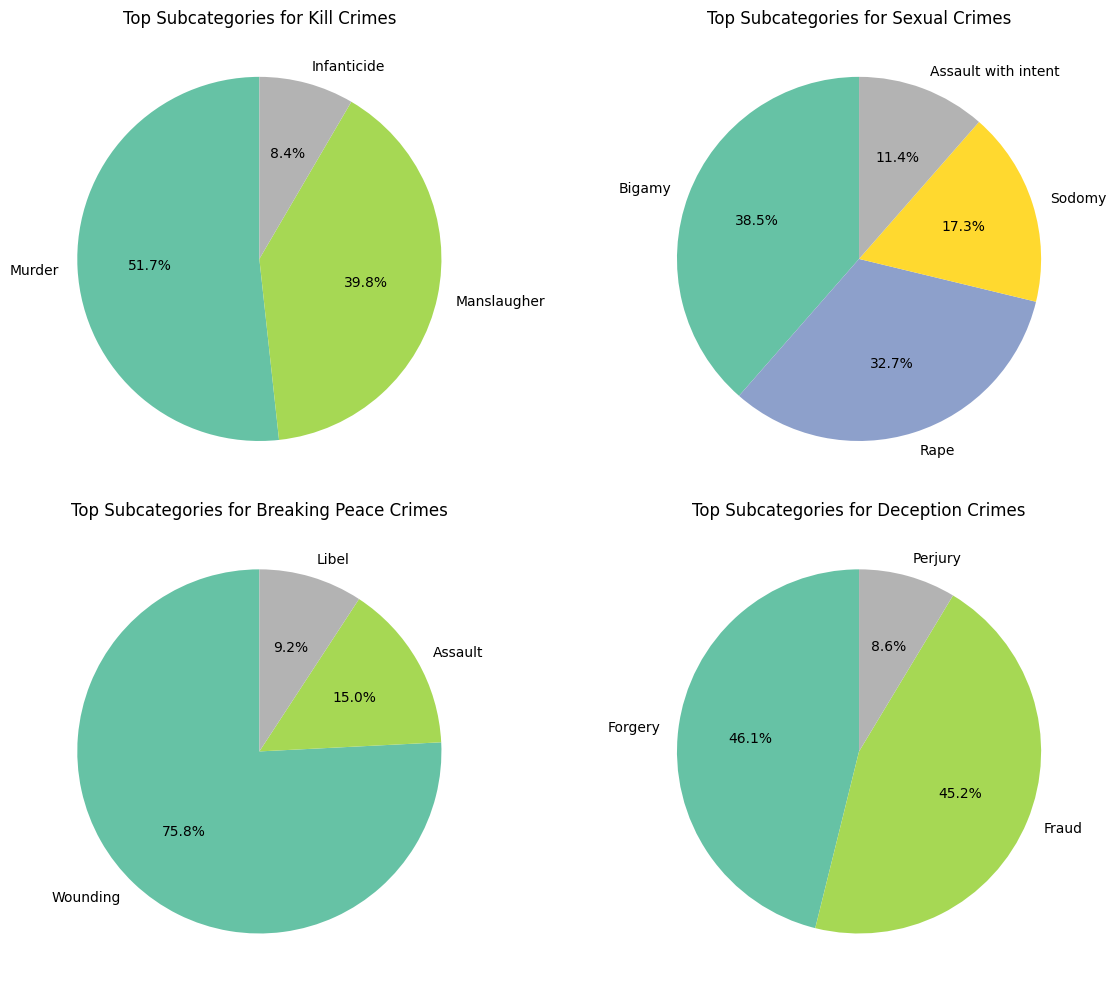

In [37]:
crime_subcategories = {
    "Kill": kill_sub,
    "Sexual": sexual_sub,
    "Breaking Peace": breaking_sub,
    "Deception": deception_sub
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (category, data) in enumerate(crime_subcategories.items()):
    data.plot(kind='pie',
              ax=axes[i],
              autopct='%1.1f%%',
              startangle=90,
              labels=data.index,
              colormap='Set2',
              ylabel='')
    axes[i].set_title(f"Top Subcategories for {category} Crimes")

plt.tight_layout()
plt.show()

#### Plotting punishment proportions.

Counting and renaming punishment categories.

In [38]:
df_punishment = df.explode('punishment_category')
top_punishment_counts = df_punishment['punishment_category'].value_counts().head(5)
top_punishment_counts.rename({'imprison': 'Imprison', 'transport': 'Transport', 'miscPunish': 'Miscellaneous', 'death': 'Death', 'corporal': 'Corporal'}, inplace=True)
top_punishment_counts

punishment_category
Imprison         88182
Transport        41166
Miscellaneous    12905
Death            11597
Corporal          9017
Name: count, dtype: int64

In [39]:
# To plot punishment per offence, there would be need to explode the offence category as well as punishment category, but both are not the same size
# Can be implemented on the future

Plotting punishment proportions.

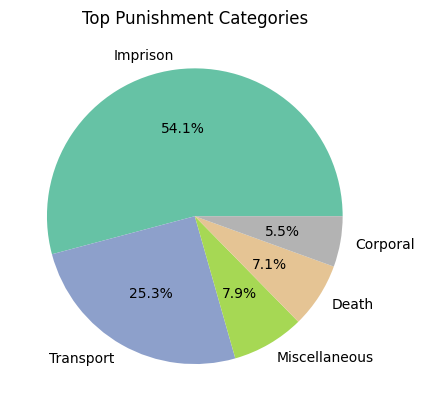

In [40]:
top_punishment_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colormap='Set2',
    labels=top_punishment_counts.index,
    ylabel='',
)
plt.title('Top Punishment Categories', loc='center')
plt.show()

#### Plotting offences count over time.

In [41]:
df

,trial_id,trial_date,defendant_gender,defendant_age,defendant_occupation,victim_gender,verdict_category,verdict_subcategory,offence_category,offence_subcategory,punishment_category,punishment_subcategory
0,t16740429-1,NaT,[male],None,None,[male],[guilty],None,[violentTheft],[highwayRobbery],None,None
1,t16740429-2,NaT,[male],None,None,[male],[guilty],None,[theft],[grandLarceny],[death],None
2,t16740429-3,NaT,"[male, male, male]",None,None,[male],[guilty],None,[theft],[burglary],None,None
3,t16740429-4,NaT,[male],None,None,[female],[notGuilty],None,[sexual],[rape],None,None
4,t16740429-5,NaT,[female],None,None,[female],[guilty],None,[theft],[other],[transport],None
...,...,...,...,...,...,...,...,...,...,...,...,...
197746,t19130401-63,1913-04-01,[male],[45],[clicker],[female],[guilty],[pleadedGuilty],[breakingPeace],[wounding],[imprison],[hardLabour]
197747,t19130401-64,1913-04-01,[male],[24],[labourer],None,[guilty],[no_subcategory],[sexual],[rape],[imprison],[hardLabour]
197748,t19130401-65,1913-04-01,"[male, male]","[24, 18]",None,[male],[notGuilty],[noEvidence],[kill],[manslaughter],None,None
197749,t19130401-66,1913-04-01,[male],[17],[labourer],None,[guilty],[no_subcategory],[sexual],[sodomy],[imprison],[otherInstitution]


In [42]:
df_offences['offence_category'].value_counts()

offence_category
theft            150993
deception         15871
royalOffences     10680
violentTheft       9012
breakingPeace      7686
sexual             7219
kill               5375
miscellaneous      3224
damage             1054
Name: count, dtype: int64

Grouping offence and trial year without NaT years.

In [43]:
df_timestamp[['offence_category', 'trial_year']][df_timestamp.trial_year != np.nan]

,offence_category,trial_year
229,[kill],1677
230,[theft],1677
231,"[theft, violentTheft, violentTheft, violentTheft]",1677
232,[royalOffences],1677
233,[royalOffences],1677
...,...,...
197746,[breakingPeace],1913
197747,[sexual],1913
197748,[kill],1913
197749,[sexual],1913


Exploding offences for proper count.

In [44]:
df_offences_over_time = df_timestamp[df_timestamp.trial_year != np.nan]
df_offences_over_time = df_offences_over_time.explode(['offence_category', 'offence_subcategory'])
df_offences_over_time_plot = df_offences_over_time[['offence_category', 'trial_year']]


In [45]:
offences_trend_over_time = df_offences_over_time_plot.value_counts()
offences_trend_over_time

offence_category  trial_year
theft             1842          2835
                  1843          2763
                  1839          2555
                  1841          2540
                  1840          2428
                                ... 
damage            1735             1
                  1734             1
                  1732             1
                  1726             1
breakingPeace     1678             1
Name: count, Length: 1956, dtype: int64

Plotting offences over time with and without theft.

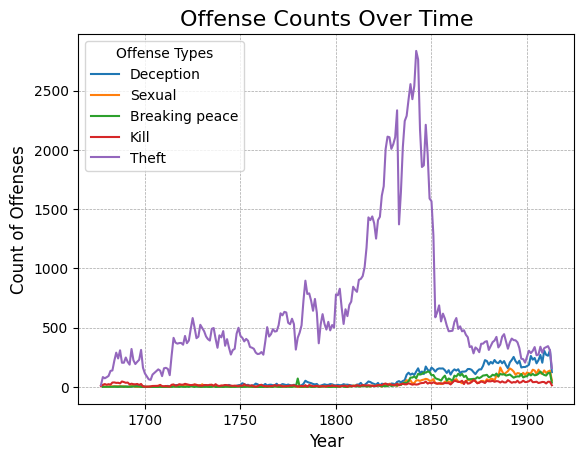

In [46]:
offences_trend_over_time['deception'].sort_index().plot(
                    kind='line',
                    label='Deception',)

offences_trend_over_time['sexual'].sort_index().plot(
                    kind='line',
                    label='Sexual')

offences_trend_over_time['breakingPeace'].sort_index().plot(
                    kind='line',
                    label='Breaking peace')

offences_trend_over_time['kill'].sort_index().plot(
                    kind='line',
                    label='Kill')

offences_trend_over_time['theft'].sort_index().plot(
                    kind='line',
                    label='Theft')

plt.legend(title='Offense Types')

plt.title('Offense Counts Over Time', fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Offenses', fontsize=12)

plt.show()

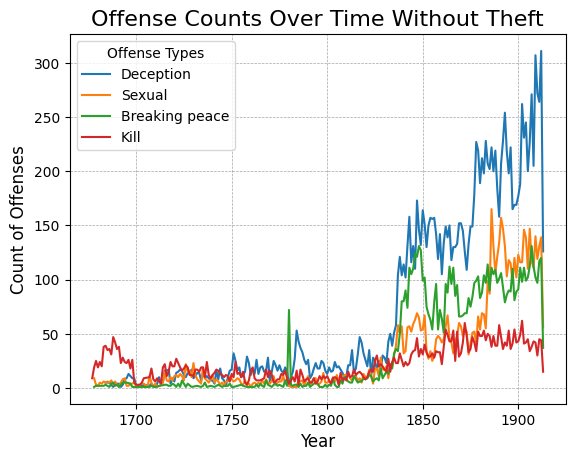

In [47]:
offences_trend_over_time['deception'].sort_index().plot(
                    kind='line',
                    label='Deception',)

offences_trend_over_time['sexual'].sort_index().plot(
                    kind='line',
                    label='Sexual')

offences_trend_over_time['breakingPeace'].sort_index().plot(
                    kind='line',
                    label='Breaking peace')

offences_trend_over_time['kill'].sort_index().plot(
                    kind='line',
                    label='Kill')

plt.legend(title='Offense Types')

plt.title('Offense Counts Over Time Without Theft', fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Offenses', fontsize=12)

plt.show()

#### Plotting punishment count over time.

In [48]:
df_punishments_over_time = df_timestamp[(df_timestamp.trial_year != np.nan)]
df_punishments_over_time = df_punishments_over_time[df_punishments_over_time['punishment_category'].notna()]
df_punishments_over_time = df_punishments_over_time.explode('punishment_category')
df_punishments_over_time

,trial_id,trial_date,defendant_gender,defendant_age,defendant_occupation,victim_gender,verdict_category,verdict_subcategory,offence_category,offence_subcategory,punishment_category,punishment_subcategory,trial_month,trial_year,trial_day
231,t16771010-3,1677-10-10,"[male, male]",None,None,"[male, male]","[notGuilty, guilty, guilty, notGuilty]",None,"[theft, violentTheft, violentTheft, violentTheft]","[other, highwayRobbery, highwayRobbery, highwa...",death,None,10,1677,10
237,t16771010-9,1677-10-10,[male],None,None,None,[guilty],None,[theft],[animalTheft],death,None,10,1677,10
238,t16771010-10,1677-10-10,[male],None,None,None,"[notGuilty, guilty]",None,"[theft, theft]","[theftFromPlace, other]",miscPunish,[branding],10,1677,10
244,t16771212-6,1677-12-12,[female],None,None,None,[guilty],None,[theft],[shoplifting],death,None,12,1677,12
245,t16771212-7,1677-12-12,"[male, female]",None,None,None,"[notGuilty, guilty]",None,[royalOffences],[coiningOffences],death,[burning],12,1677,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197745,t19130401-62,1913-04-01,[male],[45],[labourer],[male],[guilty],[pleadedGuilty],[theft],[simpleLarceny],imprison,[hardLabour],4,1913,1
197746,t19130401-63,1913-04-01,[male],[45],[clicker],[female],[guilty],[pleadedGuilty],[breakingPeace],[wounding],imprison,[hardLabour],4,1913,1
197747,t19130401-64,1913-04-01,[male],[24],[labourer],None,[guilty],[no_subcategory],[sexual],[rape],imprison,[hardLabour],4,1913,1
197749,t19130401-66,1913-04-01,[male],[17],[labourer],None,[guilty],[no_subcategory],[sexual],[sodomy],imprison,[otherInstitution],4,1913,1


In [49]:
punishments_trend_over_time = df_punishments_over_time[['punishment_category','trial_year']].value_counts()
punishments_trend_over_time

punishment_category  trial_year
imprison             1842          1950
                     1843          1948
                     1847          1747
                     1841          1709
                     1844          1610
                                   ... 
                     1738             1
                     1742             1
                     1749             1
                     1751             1
transport            1895             1
Name: count, Length: 1241, dtype: int64

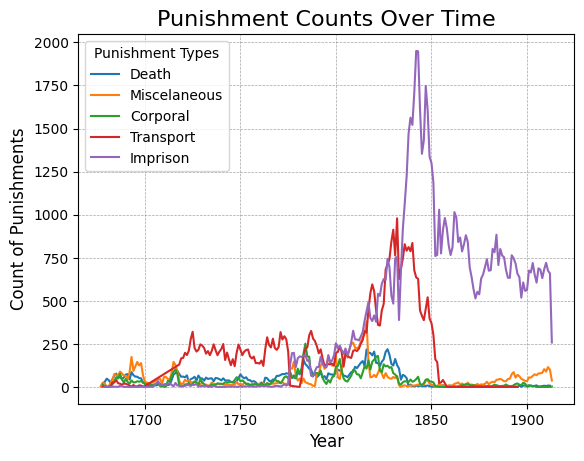

In [50]:
punishments_trend_over_time['death'].sort_index().plot(
                    kind='line',
                    label='Death',)

punishments_trend_over_time['miscPunish'].sort_index().plot(
                    kind='line',
                    label='Miscelaneous')

punishments_trend_over_time['corporal'].sort_index().plot(
                    kind='line',
                    label='Corporal')

punishments_trend_over_time['transport'].sort_index().plot(
                    kind='line',
                    label='Transport')

punishments_trend_over_time['imprison'].sort_index().plot(
                    kind='line',
                    label='Imprison')

plt.legend(title='Punishment Types')

plt.title('Punishment Counts Over Time', fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Punishments', fontsize=12)

plt.show()

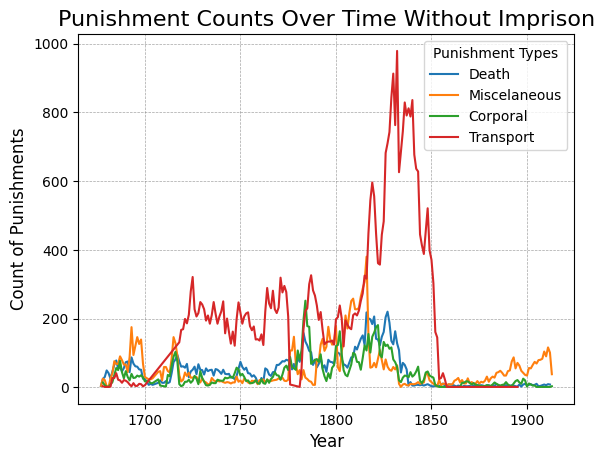

In [51]:
punishments_trend_over_time['death'].sort_index().plot(
                    kind='line',
                    label='Death',)

punishments_trend_over_time['miscPunish'].sort_index().plot(
                    kind='line',
                    label='Miscelaneous')

punishments_trend_over_time['corporal'].sort_index().plot(
                    kind='line',
                    label='Corporal')

punishments_trend_over_time['transport'].sort_index().plot(
                    kind='line',
                    label='Transport')


plt.legend(title='Punishment Types')

plt.title('Punishment Counts Over Time Without Imprison', fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Punishments', fontsize=12)

plt.show()

## What is the relation between gender and crime committing? Has it changed over the years?

In [52]:
df_timestamp[['defendant_gender', 'defendant_age', 'defendant_occupation', 'offence_category', 'punishment_category', 'trial_year']]

,defendant_gender,defendant_age,defendant_occupation,offence_category,punishment_category,trial_year
0,[male],None,None,[violentTheft],None,<NA>
1,[male],None,None,[theft],[death],<NA>
2,"[male, male, male]",None,None,[theft],None,<NA>
3,[male],None,None,[sexual],None,<NA>
4,[female],None,None,[theft],[transport],<NA>
...,...,...,...,...,...,...
197746,[male],[45],[clicker],[breakingPeace],[imprison],1913
197747,[male],[24],[labourer],[sexual],[imprison],1913
197748,"[male, male]","[24, 18]",None,[kill],None,1913
197749,[male],[17],[labourer],[sexual],[imprison],1913


Gender distribution over the trials.

In [53]:
df_gender = df_timestamp['defendant_gender']
df_gender = df_gender.explode('defendant_gender')
df_gender = df_gender[~df_gender.isin(['indeterminate'])]
df_gender_plot = df_gender.value_counts()
df_gender_plot

defendant_gender
male      193332
female     53404
Name: count, dtype: int64

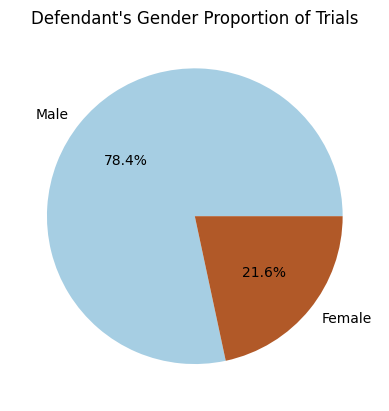

In [54]:
df_gender_plot.plot(kind='pie',
                    y='count',
                    autopct='%1.1f%%',
                    colormap='Paired',
                    labels=['Male', 'Female',],
                    ylabel='',
                    )
plt.title("Defendant's Gender Proportion of Trials", loc='center')
plt.show()

### Plotting gender distribution over time

In [55]:
df_gender_time = df_timestamp[['defendant_gender', 'trial_year']][df_timestamp.trial_year != np.nan]
df_gender_time = df_gender_time.explode('defendant_gender')
df_gender_time = df_gender_time[~df_gender_time.isin(['indeterminate'])]
df_gender_time_plot = df_gender_time[['defendant_gender', 'trial_year']].value_counts()
df_gender_time_plot

defendant_gender  trial_year
male              1843          2963
                  1842          2898
                  1848          2613
                  1847          2578
                  1841          2562
                                ... 
                  1703            42
female            1703            35
male              1677            18
female            1677             9
male              1706             1
Name: count, Length: 469, dtype: int64

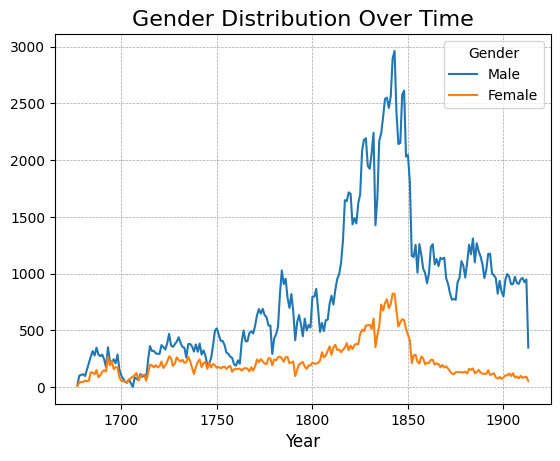

In [56]:
df_gender_time_plot['male'].sort_index().plot(
                    kind='line',
                    label='Male',)

df_gender_time_plot['female'].sort_index().plot(
                    kind='line',
                    label='Female')
plt.legend(title='Gender')

plt.title('Gender Distribution Over Time', fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.show()

### Plotting gender distribution over offences

In [57]:
df_gender_offense = df_timestamp[['defendant_gender', 'offence_category', 'trial_year']][(df_timestamp.trial_year != np) & df_timestamp.defendant_gender.notna()]
df_gender_offense

,defendant_gender,offence_category,trial_year
229,[male],[kill],1677
230,[male],[theft],1677
231,"[male, male]","[theft, violentTheft, violentTheft, violentTheft]",1677
232,[male],[royalOffences],1677
233,[male],[royalOffences],1677
...,...,...,...
197746,[male],[breakingPeace],1913
197747,[male],[sexual],1913
197748,"[male, male]",[kill],1913
197749,[male],[sexual],1913


In [58]:
df_gender_offense[(df_gender_offense['offence_category'].str.len() != df_gender_offense['defendant_gender'].str.len())]
df_gender_offense = df_gender_offense.explode('offence_category')
df_gender_offense = df_gender_offense.explode('defendant_gender')
df_gender_offense = df_gender_offense[~df_gender_offense.isin(['indeterminate'])]
df_gender_offense

,defendant_gender,offence_category,trial_year
229,male,kill,1677
230,male,theft,1677
231,male,theft,1677
231,male,theft,1677
231,male,violentTheft,1677
...,...,...,...
197747,male,sexual,1913
197748,male,kill,1913
197748,male,kill,1913
197749,male,sexual,1913


In [59]:
df_gender_offense_plot = df_gender_offense[['defendant_gender', 'offence_category']].value_counts()
df_gender_offense_plot

defendant_gender  offence_category
male              theft               146575
female            theft                46311
male              deception            18117
                  violentTheft         12046
                  royalOffences        10598
                  breakingPeace         8312
                  sexual                7519
                  kill                  4997
female            royalOffences         3945
male              miscellaneous         3434
female            violentTheft          1747
                  deception             1732
                  kill                  1478
                  miscellaneous         1307
                  breakingPeace         1180
male              damage                1073
female            sexual                 620
                  damage                 217
Name: count, dtype: int64

In [60]:
# Reindexing to set only one index (trial_defendant_gender)
df_gender_offense_plot = df_gender_offense_plot.unstack(level=0)
df_gender_offense_plot

defendant_gender,female,male
offence_category,,
breakingPeace,1180,8312
damage,217,1073
deception,1732,18117
kill,1478,4997
miscellaneous,1307,3434
royalOffences,3945,10598
sexual,620,7519
theft,46311,146575
violentTheft,1747,12046


In [61]:
male_gender_offense_plot = df_gender_offense_plot['male']
male_gender_offense_plot

offence_category
breakingPeace      8312
damage             1073
deception         18117
kill               4997
miscellaneous      3434
royalOffences     10598
sexual             7519
theft            146575
violentTheft      12046
Name: male, dtype: int64

In [62]:
female_gender_offense_plot = df_gender_offense_plot['female']
female_gender_offense_plot

offence_category
breakingPeace     1180
damage             217
deception         1732
kill              1478
miscellaneous     1307
royalOffences     3945
sexual             620
theft            46311
violentTheft      1747
Name: female, dtype: int64

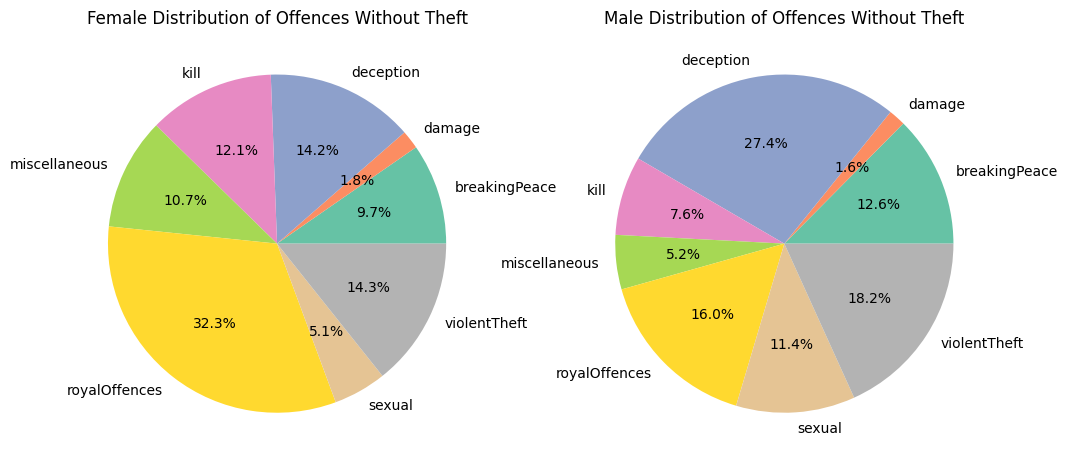

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

female_gender_offense_plot[female_gender_offense_plot.index != 'theft'].plot(kind='pie',
                      autopct='%1.1f%%',
                      colormap='Set2',
                      ylabel='',
                      startangle=0,
                      ax=axes[0]
                      )

male_gender_offense_plot[male_gender_offense_plot.index != 'theft'].plot(kind='pie',
                                                                        autopct='%1.1f%%',
                                                                        colormap='Set2',
                                                                        ylabel='',
                                                                        startangle=0,
                                                                        ax=axes[1]
                                                                         )

axes[0].set_title('Female Distribution of Offences Without Theft')
axes[1].set_title('Male Distribution of Offences Without Theft')
plt.show()